## Linear Regression from Scratch
Created by :
- Michael Hans
- 13518056

In [134]:
include("loader.jl")
include("regression.jl")
include("visualizer.jl")
using .DataLoader
using .LinearRegression
using .Visualizer
using Plots

### 1. Mengambil data CSV

In [135]:
fileName = "car_data.csv"
splitFactor = 0.8
DataLDR = DataLoader.Loader(fileName, splitFactor, [], [], [], 0, [], [])

Main.DataLoader.Loader("car_data.csv", 0.8, Any[], Any[], Any[], 0, Any[], Any[])

### 2. Memproses data mentah

In [136]:
DataLoader.loader_run(DataLDR)

Train Dataframe
241×9 DataFrames.DataFrame
│ Row │ Car_Name                  │ Year  │ Selling_Price │ Present_Price │ Kms_Driven │ Fuel_Type │ Seller_Type │ Transmission │ Owner │
│     │ String                    │ Int64 │ Float64       │ Float64       │ Int64      │ String    │ String      │ String       │ Int64 │
├─────┼───────────────────────────┼───────┼───────────────┼───────────────┼────────────┼───────────┼─────────────┼──────────────┼───────┤
│ 1   │ ritz                      │ 2014  │ 3.35          │ 5.59          │ 27000      │ Petrol    │ Dealer      │ Manual       │ 0     │
│ 2   │ sx4                       │ 2013  │ 4.75          │ 9.54          │ 43000      │ Diesel    │ Dealer      │ Manual       │ 0     │
│ 3   │ ciaz                      │ 2017  │ 7.25          │ 9.85          │ 6900       │ Petrol    │ Dealer      │ Manual       │ 0     │
│ 4   │ wagon r                   │ 2011  │ 2.85          │ 4.15          │ 5200       │ Petrol    │ Dealer      │ Manual       │

│ 58  │ corolla altis             │ 2010  │ 4.75          │ 18.54         │ 50000      │ Petrol    │ Dealer      │ Manual       │ 0     │
│ 59  │ etios g                   │ 2014  │ 4.1           │ 6.8           │ 39485      │ Petrol    │ Dealer      │ Manual       │ 1     │
│ 60  │ fortuner                  │ 2014  │ 19.99         │ 35.96         │ 41000      │ Diesel    │ Dealer      │ Automatic    │ 0     │
│ 61  │ corolla altis             │ 2013  │ 6.95          │ 18.61         │ 40001      │ Petrol    │ Dealer      │ Manual       │ 0     │
│ 62  │ etios cross               │ 2015  │ 4.5           │ 7.7           │ 40588      │ Petrol    │ Dealer      │ Manual       │ 0     │
│ 63  │ fortuner                  │ 2014  │ 18.75         │ 35.96         │ 78000      │ Diesel    │ Dealer      │ Automatic    │ 0     │
│ 64  │ fortuner                  │ 2015  │ 23.5          │ 35.96         │ 47000      │ Diesel    │ Dealer      │ Automatic    │ 0     │
│ 65  │ fortuner                  

│ 122 │ Royal Enfield Thunder 350 │ 2011  │ 1.05          │ 1.5           │ 6900       │ Petrol    │ Individual  │ Manual       │ 0     │
│ 123 │ Royal Enfield Bullet 350  │ 2016  │ 1.05          │ 1.17          │ 6000       │ Petrol    │ Individual  │ Manual       │ 0     │
│ 124 │ Royal Enfield Classic 350 │ 2013  │ 1.0           │ 1.47          │ 46500      │ Petrol    │ Individual  │ Manual       │ 0     │
│ 125 │ Royal Enfield Classic 500 │ 2012  │ 0.95          │ 1.75          │ 11500      │ Petrol    │ Individual  │ Manual       │ 0     │
│ 126 │ Royal Enfield Classic 500 │ 2009  │ 0.9           │ 1.75          │ 40000      │ Petrol    │ Individual  │ Manual       │ 0     │
│ 127 │ Bajaj Avenger 220         │ 2017  │ 0.9           │ 0.95          │ 1300       │ Petrol    │ Individual  │ Manual       │ 0     │
│ 128 │ Bajaj Avenger 150         │ 2016  │ 0.75          │ 0.8           │ 7000       │ Petrol    │ Individual  │ Manual       │ 0     │
│ 129 │ Honda CB Hornet 160R      

│ 181 │ Hero Honda Passion Pro    │ 2012  │ 0.3           │ 0.51          │ 60000      │ Petrol    │ Individual  │ Manual       │ 0     │
│ 182 │ Hero Splender Plus        │ 2016  │ 0.3           │ 0.48          │ 50000      │ Petrol    │ Individual  │ Manual       │ 0     │
│ 183 │ Honda CB Shine            │ 2013  │ 0.3           │ 0.58          │ 30000      │ Petrol    │ Individual  │ Manual       │ 0     │
│ 184 │ Bajaj Discover 100        │ 2013  │ 0.27          │ 0.47          │ 21000      │ Petrol    │ Individual  │ Manual       │ 0     │
│ 185 │ Bajaj Pulsar 150          │ 2008  │ 0.25          │ 0.75          │ 26000      │ Petrol    │ Individual  │ Manual       │ 1     │
│ 186 │ Suzuki Access 125         │ 2008  │ 0.25          │ 0.58          │ 1900       │ Petrol    │ Individual  │ Automatic    │ 0     │
│ 187 │ TVS Wego                  │ 2010  │ 0.25          │ 0.52          │ 22000      │ Petrol    │ Individual  │ Automatic    │ 0     │
│ 188 │ Honda CB twister          

│ 241 │ verna                     │ 2012  │ 5.35          │ 9.4           │ 32322      │ Diesel    │ Dealer      │ Manual       │ 0     │

Test Dataframe
61×9 DataFrames.DataFrame
│ Row │ Car_Name │ Year  │ Selling_Price │ Present_Price │ Kms_Driven │ Fuel_Type │ Seller_Type │ Transmission │ Owner │
│     │ String   │ Int64 │ Float64       │ Float64       │ Int64      │ String    │ String      │ String       │ Int64 │
├─────┼──────────┼───────┼───────────────┼───────────────┼────────────┼───────────┼─────────────┼──────────────┼───────┤
│ 1   │ verna    │ 2012  │ 5.35          │ 9.4           │ 32322      │ Diesel    │ Dealer      │ Manual       │ 0     │
│ 2   │ xcent    │ 2015  │ 4.75          │ 7.13          │ 35866      │ Petrol    │ Dealer      │ Manual       │ 1     │
│ 3   │ xcent    │ 2014  │ 4.4           │ 7.13          │ 34000      │ Petrol    │ Dealer      │ Manual       │ 0     │
│ 4   │ i20      │ 2016  │ 6.25          │ 7.6           │ 7000       │ Petrol    │ Dealer    

### 3. Melakukan splitting dataset

In [137]:
DataLoader.column_Information(DataLDR)

All column: 
1. Car_Name
2. Year
3. Selling_Price
4. Present_Price
5. Kms_Driven
6. Fuel_Type
7. Seller_Type
8. Transmission
9. Owner

Numeric columns: 
1. Year
2. Selling_Price
3. Present_Price
4. Kms_Driven
5. Owner



In [138]:
Variabel_Bebas = ["Selling_Price", "Kms_Driven"]
Variabel_Terikat = ["Present_Price"]
DataLoader.assign_x_y_variables(DataLDR, Variabel_Bebas, Variabel_Terikat)

Selected x variable: 
1. Selling_Price
2. Kms_Driven

Selected y variable: 
1. Present_Price


In [139]:
XTrain = DataLoader.get_X_train(DataLDR)
YTrain = DataLoader.get_Y_train(DataLDR)
XTest = DataLoader.get_X_test(DataLDR)
YTest = DataLoader.get_Y_test(DataLDR)

1-element Array{Any,1}:
 Any[9.4, 7.13, 7.13, 7.6, 9.4, 9.4, 6.79, 9.4, 4.6, 7.6  …  6.1, 8.4, 9.9, 6.8, 13.09, 11.6, 5.9, 11.0, 12.5, 5.9]

### 4. Memasukkan data Train ke algoritma Linear Regression

In [140]:
N = length(XTrain[1])
k = length(XTrain)
Reg = LinearRegression.Regression(XTrain, YTrain, [], N, k)
LinearRegression.run(Reg)

success
y_hat = -0.6868083308323415 + 1.5184278870867949x1 + 3.709646817783873e-5x2


### 5. Melakukan prediksi terhadap data Test

In [141]:
LinearRegression.test(Reg, XTest, YTest)

#		X1		X2		Y		 YHat
1		5.35		32322		9.4		8.635812909526113
2		4.75		35866		7.13		7.856226060496298
3		4.4		34000		7.13		7.255554290396074
4		6.25		7000		7.6		9.063041240704996
5		5.95		49000		9.4		10.165564538048185
6		5.2		71000		9.4		9.84286592264554
7		3.75		35000		6.79		6.305672631967496
8		5.95		36000		9.4		9.683310451736283
9		4.0		30000		4.6		6.4997972628500005
10		5.25		17000		7.6		7.91557803539659
11		12.9		35934		13.6		20.23393590008977
12		5.0		56701		9.9		9.008737946753266
13		5.4		31427		6.82		8.678532964861288
14		7.2		48000		9.9		12.02650292872884
15		5.25		54242		9.9		9.29712470327566
16		3.0		53675		5.35		5.859628259873537
17		10.25		49562		13.6		16.71565266763735
18		8.5		40324		13.6		13.715706692208583
19		8.4		25000		13.6		12.995397625142703
20		3.9		36054		7.0		6.572536492489956
21		9.15		29223		13.6		14.290876925572814
22		5.5		5600		5.97		7.872285269940927
23		4.0		40023		5.8		6.871615163396478
24		6.6		16002		7.7		9.928433407722277
25		4.0		40026		7.0		6.8717264

### 6. Menunjukkan akurasi dari algoritma terhadap dataset

### 7. Memvisualisasikan hasil prediksi dengan scatter plot dan line plot

In [142]:
nX = length(XTest)
nY = length(YTest)
print("Visualizing..")
PP = []
for i = 1:nX
    for j = 1:nY
        RegViz = LinearRegression.Regression([XTrain[i]], [YTrain[j]], [], length(XTrain[1]), 1)
        LinearRegression.run(RegViz)
        x_label = DataLoader.get_x_column(DataLDR, i)
        y_label = DataLoader.get_y_column(DataLDR, j)
        scatter(XTest, YTest, title = "Hallo")
        P = Visualizer.Visualize(XTest[i], YTest[j], RegViz.matB[1][1], RegViz.matB[1][2], x_label, y_label)
        append!(PP, [P])
    end
end

Visualizing..success
y_hat = 0.6494353650615499 + 1.5333198675179325x1
success
y_hat = 5.441822011393609 + 4.7318304646326656e-5x1


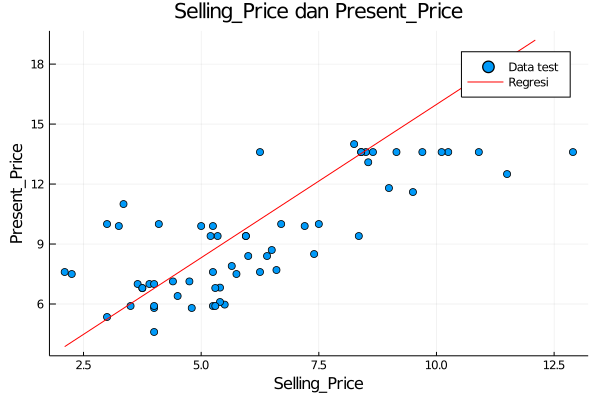

In [143]:
plot(PP[1])

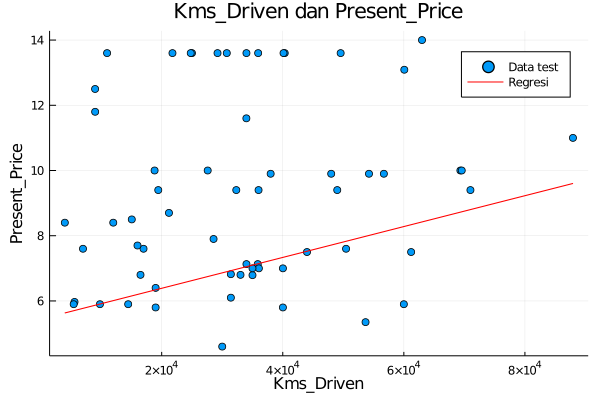

In [144]:
plot(PP[2])